In [127]:

import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import CRS
import contextily as ctx


In [99]:
place_name = "Helsinki, Finland"
graph = ox.graph_from_place(place_name, network_type="drive")

In [100]:
graph_proj = ox.project_graph(graph)


In [101]:
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)


# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull

# Centroid
centroid = convex_hull.centroid

In [114]:
from geopandas.tools import geocode

d= {"id": [1,2], "addr": ["Porthania, Helsinki, Finland", "Viikin kampus, Helsinki"]}
data = pd.DataFrame(data=d)

geo = geocode(data['addr'], provider='nominatim', user_agent='SK', timeout=4)


In [115]:
#check CRS systems, they are different
CRS(geo.crs).to_epsg()
print(geo.crs)
CRS(edges_proj.crs).to_epsg()

{'init': 'epsg:4326', 'no_defs': True}


32635

In [116]:
#convert to same CRS system and vefiry it
geo = geo.to_crs(epsg=32635)
CRS(geo.crs).to_epsg()
geo.crs == edges_proj.crs

False

In [117]:
print(geo.crs)

{'init': 'epsg:32635', 'no_defs': True}


In [118]:
geo

,geometry,address
0,POINT (386167.844 6672145.147),"Porthania, 3, Yliopistonkatu, Keskusta, Kluuvi..."
1,POINT (390198.833 6678311.191),"Helsingin yliopisto, Viikin kampusalue, Viikin..."


In [119]:
nodes_proj.head()

,y,x,osmid,highway,ref,lon,lat,geometry
3099295747,6.682156e+06,388616.837571,3099295747,NaN,NaN,24.987014,60.260806,POINT (388616.838 6682156.355)
33980425,6.674048e+06,386964.019153,33980425,NaN,NaN,24.961688,60.187590,POINT (386964.019 6674047.773)
516685833,6.675794e+06,397191.819413,516685833,NaN,NaN,25.145118,60.205965,POINT (397191.819 6675793.722)
3099295755,6.682188e+06,388591.682602,3099295755,NaN,NaN,24.986542,60.261081,POINT (388591.683 6682187.758)
1667104780,6.682723e+06,392591.348231,1667104780,NaN,NaN,25.058493,60.266957,POINT (392591.348 6682722.636)


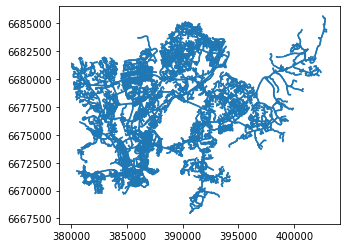

In [120]:
edges_proj.plot()

In [121]:
orig_xy = [geo["geometry"][0].y, geo["geometry"][0].x]
dest_xy = [geo["geometry"][1].y, geo["geometry"][1].x]

In [122]:
#find the nearest node to the origin and target point coordinates
orig_node = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
target_node = ox.get_nearest_node(graph_proj, dest_xy, method='euclidean')
print(orig_node)
print(target_node)

1369465861
1389896789


In [123]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='time')

In [124]:
print(route)

[1369465861, 4435014140, 1514631294, 1375815868, 1375815869, 25414177, 241595045, 1371624191, 1371624234, 313781304, 1533463009, 25453778, 269168585, 1529213793, 1528618188, 314756415, 1528618215, 269167374, 269167199, 269167203, 1526055808, 27038936, 245005514, 265772303, 265772304, 34216031, 401514114, 401514093, 401514091, 33980877, 2104003525, 33980886, 32010801, 176146390, 32010978, 246637225, 178885354, 32010986, 26064827, 251650573, 280986082, 6698426160, 31452258, 264462076, 264462075, 25544035, 1389896789]


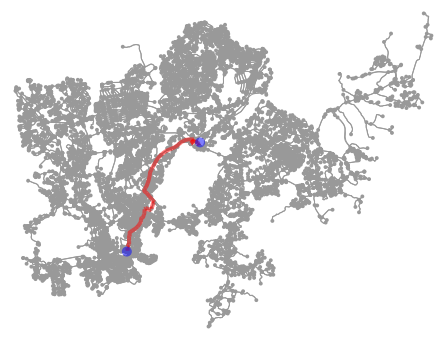

<Figure size 432x288 with 0 Axes>

In [129]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route, origin_point=orig_xy, destination_point=dest_xy)

#add basemap with contextify
cartodb_url = "https://a.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png" 

ctx.add_basemap(ax, attribution="Source: Helsinki region travel time matrix by UH. Basemap: OSM light", 
                    url=cartodb_url)

,y,x,osmid,highway,ref,lon,lat,geometry
2895844727,6.674190e+06,398955.653219,2895844727,NaN,NaN,25.17772,60.192012,POINT (398955.653 6674189.917)
